# Instructions to Run Code
- Please run cell by cell **only once** down the entire notebook in sequence. Else, error may occur as some outputs are carried forward.
- Do change your directory to access the the datasets if required.

In [1]:
import pandas as pd
import numpy as np

# Question 1 Linear Classification
input `x`: 2 features
- `x1`: symmetry
- `x2`: average intensi|ty


**Data**

column 1: symmetry `x1`

column 2: average intensity `x2`

column 3: true label `y`

**How to differentiate between digits 1 and 5**

Digit 1
- higher symmetry
- lower average intensity

Digit 5
- lower symmetry
- higher average intensity


## Overview of Implementation
Two functions are implemented
- `perceptron_algo`: perceptron algorithm and train the training set with an epoch value
- `accuracy`: test perceptron algorithm trained in `perceptron_algo` on a test set, and gives accuracy on the test set

In [2]:
df_train = pd.read_csv('HW1_data/1/train_1_5.csv', sep = ",", header = None)
df_test = pd.read_csv('HW1_data/1/test_1_5.csv', sep = ",", header = None)

In [3]:
df_train.head(10)

,0,1,2
0,-0.725767,0.022763,1.0
1,-0.811273,0.035524,1.0
2,-0.763794,0.018471,1.0
3,-0.720302,0.056489,1.0
4,-0.315630,0.489584,-1.0
5,-0.191334,0.549849,-1.0
6,-0.581806,0.031112,1.0
7,-0.775440,0.057122,1.0
8,-0.588019,0.035959,1.0
9,-0.603718,0.416614,-1.0


In [4]:
df_test.head(10)

,0,1,2
0,-0.551897,0.071675,1.0
1,-0.752347,0.040738,1.0
2,-0.736452,0.087617,1.0
3,-0.718523,0.072174,1.0
4,-0.681187,0.044814,1.0
5,-0.688268,0.039957,1.0
6,-0.747926,0.063183,1.0
7,-0.521398,0.097626,1.0
8,-0.723440,0.098275,1.0
9,-0.822631,0.028753,1.0


In [5]:
def perceptron_algo(data, epoch):
    # initialise weight parameters to zero
    weight_vector = np.array([0,0])
    weight_vector = weight_vector.astype('float64') # convert values from int to float
    offset = 0.0
    
    for i in range(epoch):
        # print("epoch " + str(i + 1))
        for row in range(len(data)):
            # get the x and y values of a training example
            # x input values is converted to a numpy array to carry out dot product operation
            x_input = np.array([data.iloc[row, 0], data.iloc[row, 1]])
            y_true_label = data.iloc[row, 2]
            classifier = np.dot(weight_vector, x_input) + offset
            
            # check condition to determine whether theta should be updated
            # if y * theta.x <= 0: update weights and offset values
            if (y_true_label * classifier) <= 0.0:     # sign is different
                weight_vector = weight_vector + y_true_label * x_input
                offset += y_true_label
    return weight_vector, offset

In [6]:
def accuracy(data, weight_vector, offset):
    # initialisation of required variables
    correct_predictions = 0
    total_predictions = len(data)
    
    for row in range(len(data)):
        x_input = np.array([data.iloc[row, 0], data.iloc[row, 1]])
        y_true_label = data.iloc[row, 2]
        y_predicted = np.dot(weight_vector, x_input) + offset
        
        # if the classifier value returns < 0, the data point is classified in the opposite direction of weight vector
        # hence, assign value of -1.0
        if y_predicted < 0.0:
            y_predict_label = -1.0

        # if the classifier value returns >= 0, the data point is classified in the direction of weight vector
        # hence, assign value of 1.0
        if y_predicted >= 0.0:
            y_predict_label = 1.0

        # check if predicted y value is the same as the true y label
        if y_true_label == y_predict_label:
            correct_predictions += 1

    accuracy = correct_predictions / len(data)
    return accuracy

## Question 1(a)
Run with **1 epoch**

In [7]:
weight_vector1, offset1 = perceptron_algo(df_train, 1)
# values returned from perceptron_algo function refer to the weight vector array, and offset value
print("weight vector: where x1 = symmetry, x2 = average intensity")
print(weight_vector1)
print("\n")
print("offset")
print(offset1)

weight vector: where x1 = symmetry, x2 = average intensity
[-2.4483233  -5.88190688]


offset
0.0


In [8]:
accuracy1 = accuracy(df_test, weight_vector1, offset1)
print("accuracy based on 1 epoch")
print(accuracy1)

accuracy based on 1 epoch
0.9670658682634731


## Question 1(b)
Run with **5 epochs**

In [9]:
weight_vector5, offset5 = perceptron_algo(df_train, 5)
# values returned from perceptron_algo function refer to the weight vector array, and offset value
print("weight vector: where x1 = symmetry, x2 = average intensity")
print(weight_vector5)
print("\n")
print("offset")
print(offset5)

weight vector: where x1 = symmetry, x2 = average intensity
[-2.05895878 -8.83521606]


offset
1.0


In [10]:
accuracy5 = accuracy(df_test, weight_vector5, offset5)
print("accuracy based on 5 epochs")
print(accuracy5)

accuracy based on 5 epochs
0.9670658682634731


# Question 2 Linear and Polynomial Regression

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
x_dat = np.genfromtxt('HW1_data/2/hw1x.dat', delimiter = "\n", dtype = "float64")
y_dat = np.genfromtxt('HW1_data/2/hw1y.dat', delimiter = "\n", dtype = "float64")

In [13]:
x_dat.shape
# (200,)
y_dat.shape
# (200,)

(200,)

In [14]:
df2_x = pd.DataFrame({'x': x_dat})
df2_y = pd.DataFrame({'y': y_dat})
n = len(x_dat)

In [15]:
df2_x.head(5)

,x
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05


In [16]:
df2_y.head(5)

,y
0,3.557667
1,4.873885
2,0.801153
3,3.942173
4,3.418765


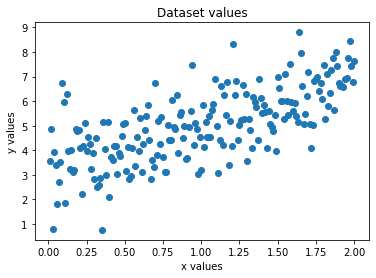

In [17]:
plt.scatter(x = df2_x, y = df2_y)
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Dataset values')
plt.show()

## Question 2(a)
Add a column vector of 1 to the input

In [18]:
def closed_form_weight(x, y): # x & y arguments should be dataframes
    # Initialisation
    x_val = x.to_numpy()
    y_val = y.to_numpy()
    n = len(x_val)
    
    # add a column vector of 1s to the input matrix
    vector_of_ones = np.ones(n)
    x_val = np.column_stack((x_val, vector_of_ones))
    
    # if n >= d, matrix A is invertible
    # hence we can find a closed form solution
    x_transpose = np.transpose(x_val)
    matrix_A = (1 / n) * np.dot(x_transpose, x_val)
    matrix_b = (1 / n) * np.dot(x_transpose, y_val)
    matrix_A_inv = np.linalg.inv(matrix_A)
    weight = np.dot(matrix_A_inv, matrix_b)
    return weight

In [19]:
weights = closed_form_weight(df2_x, df2_y)
print("Weight vector of closed form solution: " + str(weights))
print("theta_0 value, ie. vertical intercept: " + str(weights[1]))
print("theta_1 value, ie. gradient: " + str(weights[0]))

Weight vector of closed form solution: [[1.78157138]
 [3.2447227 ]]
theta_0 value, ie. vertical intercept: [3.2447227]
theta_1 value, ie. gradient: [1.78157138]


Plot linear regression line and data on the same graph

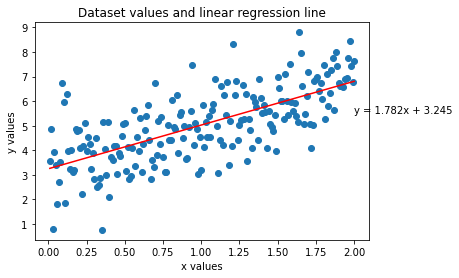

In [20]:
m = weights[0] # gradient
b = weights[1] # vertical intercept

plt.scatter(x = df2_x, y = df2_y)
plt.plot(df2_x, m * df2_x + b, color = "red")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Dataset values and linear regression line')
equation = 'y = ' + str(round(float(m), 3)) + 'x + ' + str(round(float(b), 3))
plt.annotate(equation, (2, 5.5))
plt.show()

Evaluate training error in terms of empirical risk of the resulting fit.

In [21]:
def training_error(df_x, df_y, weight_vector):
    n = len(df_x)
    x_val = df_x
    y_val = df_y
    m = weight_vector[0]
    b = weight_vector[1]
    sum_training_error = 0.0
    for i in range(n):
        x_val = df_x.iloc[i, 0]
        y_val = df_y.iloc[i, 0]
        predicted_y = m * x_val + b
        indiv_loss_func = y_val - predicted_y
        indiv_training_error = float((indiv_loss_func ** 2) / 2)
        sum_training_error += indiv_training_error
    
    empirical_risk = (1 / n) * sum_training_error
    return empirical_risk
        

In [22]:
training_error = training_error(df2_x, df2_y, weights)
print("Training error in terms of empirical risk of the resulting fit")
print(training_error)

Training error in terms of empirical risk of the resulting fit
0.5812605752543936


## Question 2(b)
**Batch gradient descent**

In [23]:
# re-initialise original data points, just in case
df2_x = pd.DataFrame({'x': x_dat})
df2_y = pd.DataFrame({'y': y_dat})
n = len(x_dat)

In [24]:
def grad_desc_avg_loss(dfx, dfy, weights):
    x = np.array(dfx)
    y = np.array(dfy)
    n = len(dfx)
    ones_vector = np.ones(n)
    x = np.c_[x, ones_vector]
        
    sum_loss = 0.0
    
    for point in range(n):
        predicted_y = np.dot(weights, x[point])
        diff_y = y[point] - predicted_y
        indiv_loss = np.power(diff_y, 2) / 2
        sum_loss += indiv_loss

    avg_loss = sum_loss / n
    return avg_loss

In [25]:
def batch_gd(dfx, dfy, learning_rate, epoch):
    # initialisation
    x_val = np.array(dfx)
    y_val = np.array(dfy)
    n = len(dfy)
    no_of_features = len(dfx.columns) + 1
    vector_of_ones = np.ones(n)
    x_val = np.c_[x_val, vector_of_ones]
    
    # initialise weight
    weights = np.zeros(no_of_features)
    best_loss = 99999999999999.0
    
#     weight_tracker = []
#     loss_tracker = []
    
    # in each epoch, using the same weights for all data points, we calculate values required
    for i in range(epoch):
        
        # loop through each data point
        for point in range(n):
            
            predicted_y = np.dot(weights, x_val[point])
            diff_y = y_val[point] - predicted_y
            weights += learning_rate * diff_y * x_val[point]
            
            # calculate average loss over all data points
            avg_loss = grad_desc_avg_loss(dfx, dfy, weights)
            
            # we only update the weight if the loss is smaller
            # else, dont udpate
            if avg_loss < best_loss:
                best_loss = avg_loss
                best_weights = weights
#         loss_tracker.append(avg_loss)
#         weight_tracker.append(best_weights)
#     print(loss_tracker)
#     print("\n")
#     print(weight_tracker)
#     print("\n")
    return best_weights, best_loss

In [26]:
weight5, loss5 = batch_gd(df2_x, df2_y, 0.01, 5)
print("BATCH GRADIENT DESCENT")
print("\n")
print("best weight based on 5 epoch")
print(weight5)
print("\n")
print("corresponding average loss")
print(loss5)
print("\n")
print("corresponding minimum empirical risk")
print(loss5 * len(df2_y))

BATCH GRADIENT DESCENT


best weight based on 5 epoch
[1.96376774 3.13119972]


corresponding average loss
[0.58371418]


corresponding minimum empirical risk
[116.74283698]


**Stochastic Gradient Descent**

In [27]:
# re-initialise original data points, just in case
df2_x = pd.DataFrame({'x': x_dat})
df2_y = pd.DataFrame({'y': y_dat})
n = len(x_dat)

In [28]:
def stochastic_gd(dfx, dfy, learning_rate, epoch):
    # initialisation
    x_val = np.array(dfx)
    y_val = np.array(dfy)
    n = len(dfy)
    no_of_features = len(dfx.columns) + 1
    vector_of_ones = np.ones(n)
    x_val = np.c_[x_val, vector_of_ones]
    
    # initialise weight
    weights = np.zeros(no_of_features)
    best_loss = 99999999999999.0
    
    np.random.seed(10)
    
    for i in range(epoch):
        
        for point in range(n):
            # select a random point in the training dataset
            random_int = np.random.randint(0, n)
            
            predicted_y = np.dot(weights, x_val[random_int])
            diff_y = y_val[random_int] - predicted_y
            weights += learning_rate * diff_y * x_val[random_int]
            
            # calculate average loss over all data points
            avg_loss = grad_desc_avg_loss(dfx, dfy, weights)
            
            # we only update the weight if the loss is smaller
            # else, dont udpate
            if avg_loss < best_loss:
                best_loss = avg_loss
                best_weights = weights
                
                
    return best_weights, best_loss            
            
            

In [29]:
sgd_weight5, sgd_loss5 = stochastic_gd(df2_x, df2_y, 0.01, 5)
print("STOCHASTIC GRADIENT DESCENT")
print("\n")
print("best weight based on 5 epoch")
print(sgd_weight5)
print("\n")
print("corresponding average loss")
print(sgd_loss5)
print("\n")
print("corresponding minimum empirical risk")
print(sgd_loss5 * len(df2_y))

STOCHASTIC GRADIENT DESCENT


best weight based on 5 epoch
[1.97301374 3.10408608]


corresponding average loss
[0.58594041]


corresponding minimum empirical risk
[117.18808127]


## Question 2(c)
`PolyRegress(x, y, d)`
- perform polynomial regression using closed form solution

In [30]:
def PolyRegress(x, y, d):   # x and y are numpy arrays
    # Initialisation
    # compute the required matrix based on the the degree of polynomial regression
    x = np.power(x[:, np.newaxis], list(range(d + 1))) # newaxis increases dimension of array by 1. it becomes 2D now
    n = len(y) # number of training examples
    
    # based on closed form solution formula
    # compute weights
    x_t = np.transpose(x)
    x_t_dot_x = np.dot(x_t, x)
    x_t_dot_x_inv = np.linalg.inv(x_t_dot_x)
    x_t_dot_y = np.dot(x_t, y)
    weights = np.dot(x_t_dot_x_inv, x_t_dot_y)

    # compute training error
    predicted_y = np.dot(x, weights)
    squared_diff_y = np.square(predicted_y - y) # element wise squaring
    # sum all values in the array to obtain a single value training loss
    training_loss_mse = np.sum(squared_diff_y / 2) / n
    
    return weights, training_loss_mse, x

## `d = 2`
Quadratic fit

In [31]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights2, training_loss2, x_val2 = PolyRegress(x, y, 2)
print("Quadratic fit")
print("d = 2")
print("\n")
print("weights")
print(weights2)
print("\n")
print("training loss: " + str(training_loss2))

Quadratic fit
d = 2


weights
[[3.58076915]
 [0.78341361]
 [0.49659591]]


training loss: 0.5703016121648223


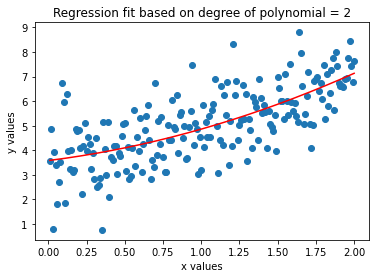

In [32]:
plt.scatter(x = x, y = y)
equation2 = np.dot(x_val2, weights2)
plt.plot(x, equation2, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 2')
plt.show()

## `d=3`

In [33]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights3, training_loss3, x_val3 = PolyRegress(x, y, 3)
print("d = 3")
print("\n")
print("weights")
print(weights3)
print("\n")
print("training loss: " + str(training_loss3))

d = 3


weights
[[3.52394943]
 [1.11846512]
 [0.08090267]
 [0.13787504]]


training loss: 0.5700844364691349


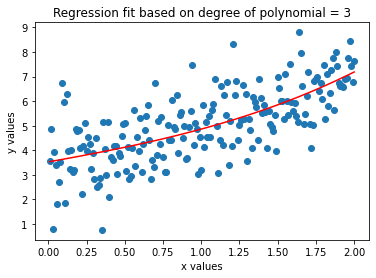

In [34]:
plt.scatter(x = x, y = y)
equation3 = np.dot(x_val3, weights3)
plt.plot(x, equation3, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 3')
plt.show()

## `d = 4`

In [35]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights4, training_loss4, x_val4 = PolyRegress(x, y, 4)
print("d = 4")
print("\n")
print("weights")
print(weights4)
print("\n")
print("training loss: " + str(training_loss4))

d = 4


weights
[[ 3.85376334]
 [-2.09126966]
 [ 7.22513464]
 [-5.38187521]
 [ 1.3730722 ]]


training loss: 0.5646163879286427


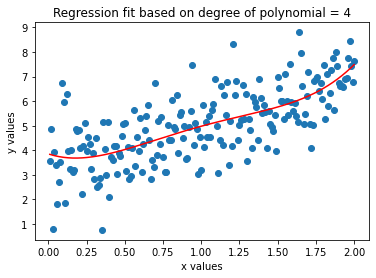

In [36]:
plt.scatter(x = x, y = y)
equation4 = np.dot(x_val4, weights4)
plt.plot(x, equation4, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 4')
plt.show()

## `d = 5`

In [37]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights5, training_loss5, x_val5 = PolyRegress(x, y, 5)
print("d = 5")
print("\n")
print("weights")
print(weights5)
print("\n")
print("training loss: " + str(training_loss5))

d = 5


weights
[[ 3.7181433 ]
 [-0.1354222 ]
 [ 0.48154349]
 [ 3.53113473]
 [-3.60926334]
 [ 0.99150956]]


training loss: 0.5638968184749199


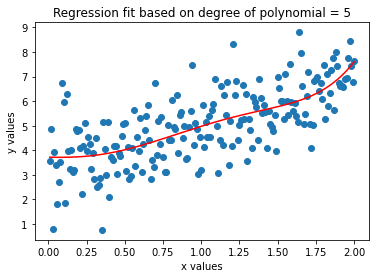

In [38]:
plt.scatter(x = x, y = y)
equation5 = np.dot(x_val5, weights5)
plt.plot(x, equation5, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 5')
plt.show()

## `d = 6`

In [39]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights6, training_loss6, x_val6 = PolyRegress(x, y, 6)
print("d = 6")
print("\n")
print("weights")
print(weights6)
print("\n")
print("training loss: " + str(training_loss6))

d = 6


weights
[[  3.43194651]
 [  5.56010885]
 [-27.43134437]
 [ 58.72902209]
 [-54.95621248]
 [ 23.44890144]
 [ -3.72427726]]


training loss: 0.5613433038902941


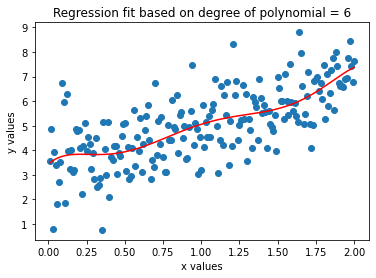

In [40]:
plt.scatter(x = x, y = y)
equation6 = np.dot(x_val6, weights6)
plt.plot(x, equation6, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 6')
plt.show()

## `d = 7`

In [41]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights7, training_loss7, x_val7 = PolyRegress(x, y, 7)
print("d = 7")
print("\n")
print("weights")
print(weights7)
print("\n")
print("training loss: " + str(training_loss7))

d = 7


weights
[[   2.98164486]
 [  17.31146625]
 [-104.72227441]
 [ 270.37449914]
 [-343.19082557]
 [ 229.48680668]
 [ -77.69332371]
 [  10.51443448]]


training loss: 0.5562352515819217


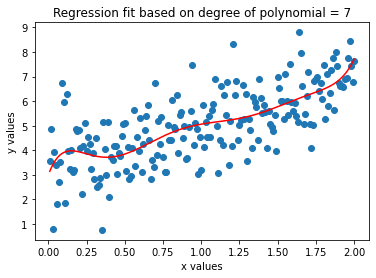

In [42]:
plt.scatter(x = x, y = y)
equation7 = np.dot(x_val7, weights7)
plt.plot(x, equation7, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 7')
plt.show()

## `d = 8`

In [43]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights8, training_loss8, x_val8 = PolyRegress(x, y, 8)
print("d = 8")
print("\n")
print("weights")
print(weights8)
print("\n")
print("training loss: " + str(training_loss8))

d = 8


weights
[[   2.63576283]
 [  28.70147488]
 [-201.17726654]
 [ 617.807055  ]
 [-987.05427933]
 [ 893.36284637]
 [-462.31419563]
 [ 127.58281082]
 [ -14.56074323]]


training loss: 0.5537805799203724


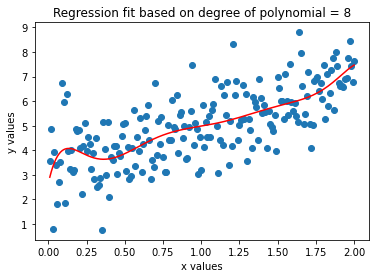

In [44]:
plt.scatter(x = x, y = y)
equation8 = np.dot(x_val8, weights8)
plt.plot(x, equation8, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 8')
plt.show()

## `d = 9`

In [45]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights9, training_loss9, x_val9 = PolyRegress(x, y, 9)
print("d = 9")
print("\n")
print("weights")
print(weights9)
print("\n")
print("training loss: " + str(training_loss9))

d = 9


weights
[[    2.40921045]
 [   37.8162533 ]
 [ -297.46866703]
 [ 1057.50156784]
 [-2043.81027222]
 [ 2357.78133392]
 [-1672.95704651]
 [  716.66016006]
 [ -170.15361214]
 [   17.20209152]]


training loss: 0.55292314869135


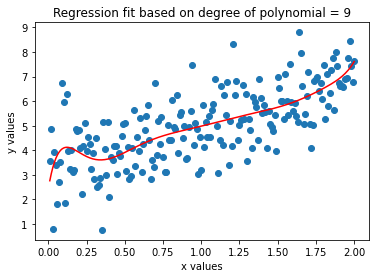

In [46]:
plt.scatter(x = x, y = y)
equation9 = np.dot(x_val9, weights9)
plt.plot(x, equation9, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 9')
plt.show()

## `d = 10`

In [47]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights10, training_loss10, x_val10 = PolyRegress(x, y, 10)
print("d = 10")
print("\n")
print("weights")
print(weights10)
print("\n")
print("training loss: " + str(training_loss10))

d = 10


weights
[[    2.65132845]
 [   30.26294422]
 [ -201.28722763]
 [  516.40951538]
 [ -414.38024902]
 [ -540.17834473]
 [ 1517.33972168]
 [-1480.42028809]
 [  750.85510254]
 [ -197.63959503]
 [   21.3777132 ]]


training loss: 0.5536428554851461


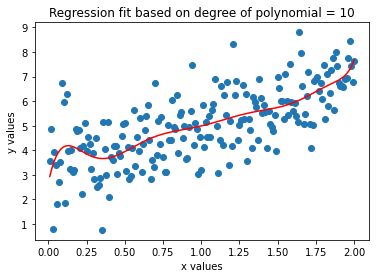

In [48]:
plt.scatter(x = x, y = y)
equation10 = np.dot(x_val10, weights10)
plt.plot(x, equation10, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 10')
plt.show()

## `d = 11`

In [49]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights11, training_loss11, x_val11 = PolyRegress(x, y, 11)
print("d = 11")
print("\n")
print("weights")
print(weights11)
print("\n")
print("training loss: " + str(training_loss11))

d = 11


weights
[[ 3.44112152e+00]
 [-9.94765472e+00]
 [ 4.26910217e+02]
 [-3.75844995e+03]
 [ 1.53178789e+04]
 [-3.53170156e+04]
 [ 5.02941133e+04]
 [-4.59190547e+04]
 [ 2.69614434e+04]
 [-9.84990918e+03]
 [ 2.03814771e+03]
 [-1.82510384e+02]]


training loss: 0.5590733282379986


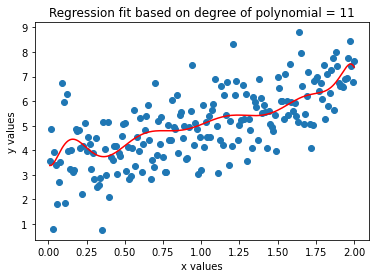

In [50]:
plt.scatter(x = x, y = y)
equation11 = np.dot(x_val11, weights11)
plt.plot(x, equation11, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 11')
plt.show()

## `d = 12`

In [51]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights12, training_loss12, x_val12 = PolyRegress(x, y, 12)
print("d = 12")
print("\n")
print("weights")
print(weights12)
print("\n")
print("training loss: " + str(training_loss12))

d = 12


weights
[[-8.80108774e-01]
 [-2.33148384e+01]
 [ 4.77888062e+02]
 [-3.88294531e+03]
 [ 1.55690918e+04]
 [-3.55536016e+04]
 [ 5.01046875e+04]
 [-4.51093281e+04]
 [ 2.59328281e+04]
 [-9.13778516e+03]
 [ 1.75132227e+03]
 [-1.19272949e+02]
 [-5.91680908e+00]]


training loss: 6.320931517926893


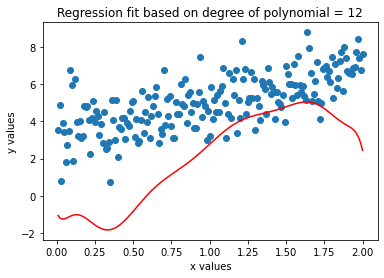

In [52]:
plt.scatter(x = x, y = y)
equation12 = np.dot(x_val12, weights12)
plt.plot(x, equation12, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 12')
plt.show()

## `d = 13`

In [53]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights13, training_loss13, x_val13 = PolyRegress(x, y, 13)
print("d = 13")
print("\n")
print("weights")
print(weights13)
print("\n")
print("training loss: " + str(training_loss13))

d = 13


weights
[[-3.50640979e+01]
 [ 2.01046066e+01]
 [ 1.23069604e+03]
 [-1.01620146e+04]
 [ 4.04063320e+04]
 [-9.28371406e+04]
 [ 1.30258500e+05]
 [-1.10335250e+05]
 [ 4.85241250e+04]
 [ 4.46718750e+01]
 [-1.23551719e+04]
 [ 6.67435156e+03]
 [-1.58623340e+03]
 [ 1.49147522e+02]]


training loss: 104.25881176935158


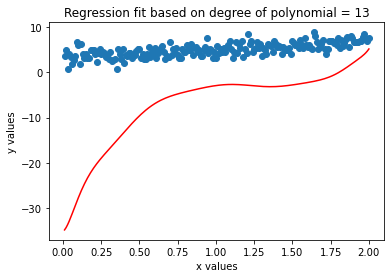

In [54]:
plt.scatter(x = x, y = y)
equation13 = np.dot(x_val13, weights13)
plt.plot(x, equation13, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 13')
plt.show()

## `d = 14`

In [55]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights14, training_loss14, x_val14 = PolyRegress(x, y, 14)
print("d = 14")
print("\n")
print("weights")
print(weights14)
print("\n")
print("training loss: " + str(training_loss14))

d = 14


weights
[[-6.02331676e+01]
 [ 2.25670509e+01]
 [ 4.17449402e+02]
 [-3.66492578e+03]
 [ 1.35756074e+04]
 [-2.58308516e+04]
 [ 2.48375156e+04]
 [-6.34918750e+03]
 [-9.90050000e+03]
 [ 9.03306250e+03]
 [-4.38429688e+02]
 [-3.17512891e+03]
 [ 1.95683936e+03]
 [-5.00745972e+02]
 [ 4.93318825e+01]]


training loss: 701.7217711114464


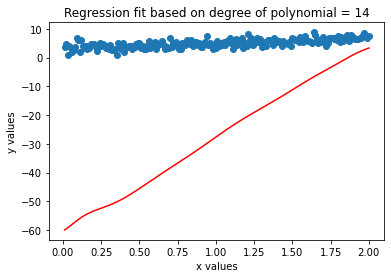

In [56]:
plt.scatter(x = x, y = y)
equation14 = np.dot(x_val14, weights14)
plt.plot(x, equation14, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 14')
plt.show()

## `d = 15`

In [57]:
x = df2_x.to_numpy()
x = x[:,0] # convert shape
y = df2_y.to_numpy()
weights15, training_loss15, x_val15 = PolyRegress(x, y, 15)
print("d = 15")
print("\n")
print("weights")
print(weights15)
print("\n")
print("training loss: " + str(training_loss15))

d = 15


weights
[[-1.34437597e+01]
 [ 7.60107880e+01]
 [ 2.02821533e+02]
 [-2.33915430e+03]
 [ 7.73177930e+03]
 [-1.05958047e+04]
 [-5.49804688e+02]
 [ 2.18062109e+04]
 [-3.08829375e+04]
 [ 1.94006875e+04]
 [-3.73154688e+03]
 [-2.49757324e+03]
 [ 1.82506311e+03]
 [-4.59920166e+02]
 [ 3.95024414e+01]
 [ 9.50695038e-01]]


training loss: 31.2557308121435


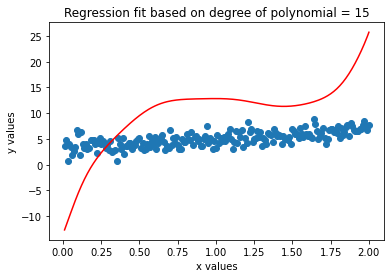

In [58]:
plt.scatter(x = x, y = y)
equation15 = np.dot(x_val15, weights15)
plt.plot(x, equation15, color = 'red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Regression fit based on degree of polynomial = 15')
plt.show()

**Training Loss based on degree of fit**

d | training loss
- | -
2 | 0.5703016121648223
3 | 0.5700844364691349
4 | 0.5646163879286427
5 | 0.5638968184749199
6 | 0.5613433038902941
7 | 0.5562352515819217
8 | 0.5537805799203724
9 | 0.55292314869135
10 | 0.5536428554851461
11 | 0.5590733282379986
12 | 6.320931517926893
13 | 104.25881176935158
14 | 701.7217711114464
15 | 31.2557308121435


Evidently, from `d = 2` to `d = 9`, training loss strictly decreases.

At `d = 9`, the training loss is the smallest.

After `d = 9`, the error gets worse.

The difference in training loss between `d = 9` and `d = 10` is not significant. 

In general, the training loss error increases significantly from `d = 12` onwards.

# Question 3 Ridge Regression

In [59]:
df3_x = pd.read_csv("HW1_data/3/hw1_ridge_x.dat", header = None)
df3_y = pd.read_csv("HW1_data/3/hw1_ridge_y.dat", header = None)

In [60]:
df3_x.head(5)


,0,1,2,3
0,-1.477524,-0.050253,-0.170236,1
1,0.907090,0.664516,0.478651,1
2,0.400322,0.432674,-0.435048,1
3,-1.653651,0.126796,1.002368,1
4,-1.066913,-0.838428,-0.348881,1


In [61]:
vX = np.matrix(df3_x.iloc[0:10, ])
tX = np.matrix(df3_x.iloc[10:, ])
vY = np.matrix(df3_y.iloc[0:10, ])
tY = np.matrix(df3_y.iloc[10:, ])

## Question 3(a) 
`ridge_regression(tX, tY, l)`

outputs the exact solution θ for ridge regression.
- use closed form solution

Report the resulting value of θ for λ = 0.15.

In [62]:
def ridge_regression(tX, tY, l):
    n = len(tX)
    features = tX.shape[1]
    x_transpose = np.transpose(tX)
    i_matrix = np.identity(features)
    matrix_A = np.add((n * l * i_matrix), np.dot(x_transpose, tX))
#     matrix_A = (n * l * i_matrix) + np.dot(x_transpose, tX)
    matrix_A_inv = np.linalg.inv(matrix_A)
    matrix_b = np.dot(x_transpose, tY)
    weights = np.dot(matrix_A_inv, matrix_b)
#     print(matrix_A.shape)
#     print(matrix_A_inv.shape)
#     print(matrix_b.shape)
    return weights
    
    

In [63]:
weights = ridge_regression(tX, tY, 0.15)
print("weights for lambda = 0.15")
print(weights)

weights for lambda = 0.15
[[-0.57939825]
 [ 1.15033028]
 [ 0.04934122]
 [-1.59867896]]


## Question 3(b)
Plot graphs of validation loss and training loss as lambda varies

In [65]:
print(tX.shape)
print(vX.shape)
print(weights.shape)

(40, 4)
(10, 4)
(4, 1)


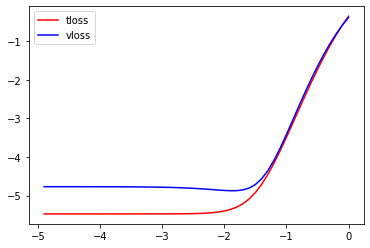

In [66]:
tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []

index = -np.arange(0,5,0.1)
for i in index:
    tloss_i = 0.0
    vloss_i = 0.0
    weight = ridge_regression(tX, tY, 10 ** i)
    t_predicted_y = np.dot(tX, weight)
    t_diff_y = np.subtract(t_predicted_y, tY)
    t_squared_diff = np.multiply(t_diff_y, t_diff_y)
    t_sum_squared_diff = np.sum(t_squared_diff)
    tloss_i += t_sum_squared_diff / tn / 2.0
    
    v_predicted_y = np.dot(vX, weight)
    v_diff_y = np.subtract(v_predicted_y, vY)
    v_squared_diff = np.multiply(v_diff_y, v_diff_y)
    v_sum_squared_diff = np.sum(v_squared_diff)   
    vloss_i += v_sum_squared_diff / vn / 2.0
    
    tloss.append(tloss_i)
    vloss.append(vloss_i)
    
#     tloss = tloss + [np.sum((np.dot(tX, weight) - tY) ** 2) / tn / 2]
#     vloss = vloss + [np.sum((np.dot(vX, weight) - vY) ** 2) / vn / 2]
# print(tloss)
plt.plot(index,np.log(tloss),'r', label = 'tloss')
plt.plot(index,np.log(vloss),'b', label = 'vloss')
plt.legend(loc="upper left")

In [68]:
print("minimum validation loss")
print(min(vloss))

print("\n")
print("corresponding lambda value")
print(10 ** (index[vloss.index(min(vloss))]))


minimum validation loss
0.007627810885830868


corresponding lambda value
0.012589254117941668


# Question 4 K-Means
- image has 516 rows and 407 columns
- length of each vector: 3
- RGB values


## Overview of Implementation
Four functions are implemented
- `find_new_cluster_and_centroid`: runs through the k-means algorithm once
- `pairwise_distance`: calculate the euclidean distance between two points
- `total_cost_of_clustering`: calculates the cost of clustering once
- `k_means-algo`: runs through the algo by repeating the iterations until minimum error is reached


In [69]:
df4 = pd.read_csv('HW1_data/4/kmeans-image.txt', header = None, delimiter = " ")
df4.head()

,0,1,2
0,129,108,61
1,117,96,51
2,102,77,36
3,94,64,26
4,97,59,22


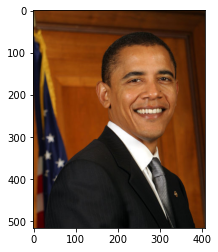

In [70]:
# to check if data is loaded correctly, load the original image
array4 = pd.read_csv('HW1_data/4/kmeans-image.txt', header = None, sep = " ").values
array4 = array4.reshape(516, 407, 3)
plt.imshow(array4)


In [71]:
# Initialise the initial centroids
R = [255, 255, 128, 0, 0, 0, 0, 0]
G = [255, 0, 0, 255, 128, 0, 0, 0]
B = [255, 0, 0, 0, 0, 255, 128, 0]
centroids_df = pd.DataFrame({'R': R, 'G': G, 'B': B})
centroids_df

,R,G,B
0,255,255,255
1,255,0,0
2,128,0,0
3,0,255,0
4,0,128,0
5,0,0,255
6,0,0,128
7,0,0,0


In [72]:
def find_new_cluster_and_centroid(centroids, data_points):  # both inputs are dataframes
    # part 1 of k-means algorithm iteration computation
    # find new clusters, while centroids are fixed
    
    # initialisation
    points_cluster = [] # states the cluster that each point belongs to
    centroids = np.matrix(centroids)
    data_points = np.matrix(data_points)
                                                            
    
    # determine which cluster each data point is in, based on the current existing centroids
    # centroids remain unchanged here
    # at the end of this for loop, we obtain a list of cluster that each data point belongs to
    for point in data_points:
        # point.shape (1, 3)
        # test_centroid.shape (8, 3)
        diff_distance_per_dim = np.subtract(point, centroids) # (8, 3)
        squared_diff_per_dim = np.square(diff_distance_per_dim)
        squared_diff = np.sum(squared_diff_per_dim, axis = 1)

        # assign the cluster that the point is assigned to
        min_squared_diff_cluster = np.argmin(squared_diff) # least cost cluster
        points_cluster.append(min_squared_diff_cluster)
        
        
    # part 2 of the k-means algorithm iteration computation
    # clusters are fixed: ie. the data points remain in the centroid it belongs to
    # find new centroids in each cluster
    
    # Initialise the matrix of new centroids after this part 2 iteration
    # new centroids will be added row by row to this matrix
    # this initial matrix is just to create the matrix, hence will be removed at the end
    update_centroid = [[0.0, 0.0, 0.0]]
    
    # loop through each cluster
    for i in range(len(centroids)):
        # initialise the squared error value of each cluster, by dimension
        points_sum_per_cluster = np.array([[0.0, 0.0, 0.0]])

        # count the number of data points in each cluster
        no_of_points = points_cluster.count(i)
        
        # there is at least one point in a cluster
        # if there is no point in a cluster, the cluster will be removed
        if no_of_points > 0: 
            
            # loop through each point in a cluster
            for data in range(len(data_points)):
                
                # from above, the point_clusters list consists of values that represent which cluster each point is in
                # i = cluster number 
                # point_clusters[data] = cluster number that the point is in
                if i == points_cluster[data]:
                    # dimensions remain. not scalar value
                    # this is because we want to get the new centroid value
                    points_sum_per_cluster = np.add(points_sum_per_cluster, data_points[data])
            
            # after looping through a cluster:
            # calculate new centroid after summing up the points in a cluster     
            indiv_cluster_centroid = points_sum_per_cluster / no_of_points
                
            # append centroid values of all clusters
            # vstack: stack array row by row                
            update_centroid = np.vstack([update_centroid, indiv_cluster_centroid])
            
            # numpy.delete(arr, obj, axis=None)
            # obj: index of the sub array to remove based on the axis specified
            # remove the update_centroid = [[0.0, 0.0, 0.0]] created to form the matrix
    update_centroid = np.delete(update_centroid, 0, 0)
    return points_cluster, update_centroid

In [73]:
def pairwise_distance(point, centroid):
    # Euclidean distance computation between two points
    # more specifically, betwee a point and a centroid
    # initialise distance to be 0
    dist = 0.0
    
    # loop through all dimensions that the point has
    for i in point:
        diff = np.subtract(i, centroid) # vector
        squared_diff = np.square(diff) # vector
        dist += np.sum(squared_diff) # scalar value

    return dist

In [74]:
def total_cost_of_clustering(data_points, clusters, centroids): # all inputs are dataframes
    # total cost based on Euclidean distance across ALL clusters
    cost = 0.0
    centroids = np.matrix(centroids)
    data_points = np.matrix(data_points)
    
    no_of_clusters = len(centroids)
    no_of_points = len(data_points)
    
    for i in range(no_of_clusters):
        for point in range(no_of_points):
            # i = cluster number
            # recall: clusters list stores the cluster each data point is in
            # [point]: index of the point across all points
            # clusters[point] = the cluster number that the point belongs to
            if i == clusters[point]:
                # add the individual cost to the overall cost
                indiv_cost = pairwise_distance(data_points[point], centroids[i])
                cost += indiv_cost
    return cost


In [75]:
def k_means_algo(points, centroids):
    # initialisation
    # keep track of each epoch's cost
    # initialise something to it so that i can track the last 2 elements in the first epoch
    # else, in the first epoch, there will only be one value in the cost_tracker list
    cost_tracker = [0.0] 
    epoch_number = 0
    centroid_tracker = [] # tracks all the centroid based on epoch number
    
    k_cluster, k_centroid = find_new_cluster_and_centroid(centroids, points)
    k_cost = total_cost_of_clustering(points, k_cluster, k_centroid)
    cost_tracker.append(k_cost)
    epoch_number += 1
    centroid_tracker.append(k_centroid)
    print("epoch: " + str(epoch_number))
    print("cost: " + str(k_cost))
    print("number of centroids: " + str(len(k_centroid)))
    print(k_centroid)
    print("\n")
    
    # continue to add one epoch at a time as long as the cost has not converted (ie. not minimised yet)
    # while loop stops when two continuous iterations give the same cost
    while cost_tracker[len(cost_tracker) - 2 ] != cost_tracker[len(cost_tracker) - 1]:
        k_cluster, k_centroid = find_new_cluster_and_centroid(k_centroid, points)
        k_cost = total_cost_of_clustering(points, k_cluster, k_centroid)
        cost_tracker.append(k_cost)
        epoch_number += 1
        centroid_tracker.append(k_centroid)
        print("epoch: " + str(epoch_number))
        print("cost: " + str(k_cost))
        print("number of centroids: " + str(len(k_centroid)))
        print(k_centroid)
        print("\n")
    # prints the final centroid
    return k_centroid

Report the error and centroid IDs at each iteration of the algorithm

Note: it takes quite a while to run.

In [76]:
k_means_algo(df4, centroids_df)

epoch: 1
cost: 305465542.2026205
number of centroids: 6
[[226.2480551  208.85269736 194.33031501]
 [203.59562026 135.48836631  77.5030484 ]
 [127.34619478  64.4117936   21.9861835 ]
 [ 92.93181818  94.45454545  89.30113636]
 [ 56.16536313  56.91284916  79.27039106]
 [ 29.20886167  23.7493684   22.21048579]]


epoch: 2
cost: 183025425.3424653
number of centroids: 6
[[235.90366054 231.99927154 226.03988345]
 [189.74227327 125.89648492  74.8227235 ]
 [129.9375122   61.3082561   14.90686585]
 [114.89179394 102.59228579  93.03986539]
 [ 55.73290027  50.30683989  57.78945357]
 [ 34.46545786  24.28230345  20.13988534]]


epoch: 3
cost: 170742827.06460875
number of centroids: 6
[[239.33307423 236.21609017 230.92324135]
 [186.91215592 122.41490858  71.43122363]
 [130.28521915  60.18096139  12.75239949]
 [122.11700535 104.7713369   92.2057754 ]
 [ 63.41741742  46.81812247  44.46624886]
 [ 34.46358131  24.01898932  19.45896082]]


epoch: 4
cost: 156809662.22456604
number of centroids: 6
[[239.490

epoch: 28
cost: 118685954.53044546
number of centroids: 6
[[240.66333066 237.90972778 232.98518815]
 [193.81395485 134.08478452  85.8348285 ]
 [137.70632304  61.71354157   9.8276333 ]
 [152.05937003  95.16732909  53.10403418]
 [ 81.08865124  37.7445405   12.64971766]
 [ 26.55844241  23.31534603  23.38056797]]


epoch: 29
cost: 118237837.67500521
number of centroids: 6
[[240.86725664 238.16874497 233.31074014]
 [194.01202186 134.85798421  87.44875531]
 [137.15430631  61.38955573   9.83620421]
 [153.97280693  95.79693304  52.06110106]
 [ 80.64368018  37.66577326  12.81704323]
 [ 26.47835713  23.30213546  23.40765099]]


epoch: 30
cost: 118046085.26928467
number of centroids: 6
[[240.98245968 238.30100806 233.46572581]
 [194.07943518 135.33901468  88.56805175]
 [136.86991001  61.25020894   9.86946296]
 [155.12801043  96.25383146  51.56314343]
 [ 80.2949885   37.58842653  12.9286536 ]
 [ 26.38706751  23.28550584  23.44071406]]


epoch: 31
cost: 117967258.08728965
number of centroids: 6
[[2

matrix([[241.2296146 , 238.62515213, 233.86288032],
        [194.41158657, 136.33311389,  90.94364714],
        [136.2655563 ,  61.08973066,  10.10385457],
        [157.29173273,  97.59397508,  51.43329558],
        [ 78.92743714,  37.10828688,  13.07070482],
        [ 25.97800232,  23.23575423,  23.60599063]])

In [77]:
# based on output above
min_error_centroids = np.matrix([[241.2296146 , 238.62515213, 233.86288032],
        [194.41158657, 136.33311389,  90.94364714],
        [136.2655563 ,  61.08973066,  10.10385457],
        [157.29173273,  97.59397508,  51.43329558],
        [ 78.92743714,  37.10828688,  13.07070482],
        [ 25.97800232,  23.23575423,  23.60599063]])

print("Number of Centroids")
print(len(min_error_centroids))
print("\n")
print("Final centroid values")
print(min_error_centroids)

Number of Centroids
6


Final centroid values
[[241.2296146  238.62515213 233.86288032]
 [194.41158657 136.33311389  90.94364714]
 [136.2655563   61.08973066  10.10385457]
 [157.29173273  97.59397508  51.43329558]
 [ 78.92743714  37.10828688  13.07070482]
 [ 25.97800232  23.23575423  23.60599063]]


In [78]:
# obtain a list of which point belongs to which cluster
# in this case, since the best centroids that minimises cost has been found above by running the k-means algo
# the min_error_centrois is equal to the final_centroids
# the purpose here is to obtain the list of which point belongs to which cluster
# because this value was not returned in the function above
final_cluster, final_centroids = find_new_cluster_and_centroid(min_error_centroids, df4)

In [81]:
# determine which centroid value we obtained above belongs to which cluster
cluster_in_order = [] # elements in this list correspond to the same index element of the centroid values obtained
for cluster_number_j in final_cluster:
    if cluster_number_j not in cluster_in_order:
        cluster_in_order.append(cluster_number_j)
        
print(cluster_in_order)
print("\n")

total_points = 0
for i in range(len(final_centroids)):
    # count the number of data points in each cluster
    no_of_points = final_cluster.count(cluster_in_order[i])
    print("centroid " + str(cluster_in_order[i]))
    centroid_value = final_centroids[cluster_in_order[i]]
    print(centroid_value)
#     print(final_centroids[i])
    print("number of data points in centroid " + str(cluster_in_order[i]))
    print(no_of_points)
    print("\n")
    total_points += no_of_points
    
print("total number of points")
print(total_points)

[3, 2, 4, 5, 1, 0]


centroid 3
[[157.29173273  97.59397508  51.43329558]]
number of data points in centroid 3
22075


centroid 2
[[136.2655563   61.08973066  10.10385457]]
number of data points in centroid 2
52535


centroid 4
[[78.92743714 37.10828688 13.07070482]]
number of data points in centroid 4
40365


centroid 5
[[25.97800232 23.23575423 23.60599063]]
number of data points in centroid 5
74917


centroid 1
[[194.41158657 136.33311389  90.94364714]]
number of data points in centroid 1
15190


centroid 0
[[241.2296146  238.62515213 233.86288032]]
number of data points in centroid 0
4930


total number of points
210012


In [82]:
# list of the final centroid values (to generate the picture) that each data point belongs to
pic_centroid_values = []

# convert cluster list to array to add centroid values to be used for generating the picture
pic_cluster_list = np.array(final_cluster)

# referred to the centroid number assigned
for point in pic_cluster_list:
    # final_centroids[point]: refers to the index of the data point in the final_centroids matrix
    # this is to obtain the centroid val to be assigned to this data point
    centroid_val_assigned = final_centroids[point]
    pic_centroid_values.append(centroid_val_assigned.astype(int))

pic_centroid_values

[matrix([[157,  97,  51]]),
 matrix([[157,  97,  51]]),
 matrix([[136,  61,  10]]),
 matrix([[78, 37, 13]]),
 matrix([[78, 37, 13]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]]),
 matrix([[136,  61,  10]])

Display the image with each pixel intensity replaced by its assigned centroid

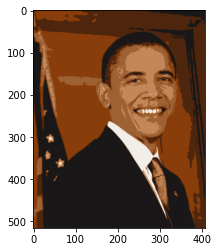

In [83]:
plt.imshow(np.reshape(pic_centroid_values, (516, 407, 3)))

**finally, please give chance to esd kid**